## 0. Working with national test data

a) Start with reading in the file riket2023_åk9_np.xlsx and the sheets for the different subjects.

b) Change the column names to get something similar to this:

c) Do some initial exploratory data analysis on this dataset. Use methods such as info, value_counts, columns, describe and some more to get a first insight into the dataset.

d) Find out the amount of students that got F in mathematics (both girls and boys).

e) Draw a bar chart on the total points for each of the subjects

f) Feel free to do more EDA on this dataset

a) 首先阅读文件 riket2023_åk9_np.xlsx 和不同科目的表格。       
b) 更改列名以获得类似于以下内容的内容：          
c) 对此数据集进行一些初步探索性数据分析。使用 info、value_counts、columns、describe 等方法来初步了解数据集。        
d) 找出数学成绩为 F 的学生数量（包括女生和男生）。              
e) 绘制每个科目的总分条形图          
f) 随意对此数据集进行更多 EDA                 

- 用 pandas 读取 Excel 文件时，包含多个 sheet 的 Excel 文档会被加载为一个字典，其中每个键对应一个 sheet 的名称，值是该 sheet 中的数据（DataFrame 格式）。

In [1]:
import pandas as pd 

# 读取 Excel 文件中的所有 sheet,
excel_data = pd.read_excel("data/riket2023_åk9_np.xlsx", sheet_name=None)

# sheet_name=None：它的作用是告诉 pandas 读取 Excel 文件时，不仅仅读取某个特定的 sheet，而是读取所有的 sheet。
# 如果你 不加 sheet_name=None，pandas.read_excel() 默认只会读取 Excel 文件中的 第一个 sheet，而不是所有的 sheet。

In [24]:
# 访问 其中一个 Sheet ‘Svenska’ ， sheet_svenska 是一个 dataframe ,# 提取 瑞典语和数学表的数据 
df_svenska = excel_data['Svenska'][8:]
df_matematik = excel_data["Matematik"][8:]
df_engelska = excel_data["Engelska"][8:]
df_andra = excel_data["Svenska som andraspråk"][8:11]
df_andra


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
8,Riket,Samtliga,14092,6447,7645,77.7,81.6,74.3,9.4,10.2,8.7
9,Riket,Kommunal,11963,5495,6468,75.9,80,72.4,9,9.9,8.3
10,Riket,Enskild,2122,949,1173,87.7,90.9,85.2,11.1,12,10.4


In [55]:
df_svenska.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 7 to 11
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   5 non-null      object
 1   Unnamed: 1   5 non-null      object
 2   Unnamed: 2   5 non-null      object
 3   Unnamed: 3   5 non-null      object
 4   Unnamed: 4   5 non-null      object
 5   Unnamed: 5   5 non-null      object
 6   Unnamed: 6   5 non-null      object
 7   Unnamed: 7   5 non-null      object
 8   Unnamed: 8   5 non-null      object
 9   Unnamed: 9   5 non-null      object
 10  Unnamed: 10  5 non-null      object
dtypes: object(11)
memory usage: 572.0+ bytes


In [28]:
df_svenska.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10'],
      dtype='object')

d) Find out the amount of students that got F in mathematics (both girls and boys).

In [57]:

df_matematik

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
8,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12
9,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
10,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13,12.8,13.1
11,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [49]:
df_matematik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 8 to 11
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   4 non-null      object 
 1   Unnamed: 1   4 non-null      object 
 2   Unnamed: 2   4 non-null      object 
 3   Unnamed: 3   4 non-null      object 
 4   Unnamed: 4   4 non-null      object 
 5   Unnamed: 5   1 non-null      float64
 6   Unnamed: 6   4 non-null      object 
 7   Unnamed: 7   4 non-null      object 
 8   Unnamed: 8   4 non-null      object 
 9   Unnamed: 9   4 non-null      object 
 10  Unnamed: 10  4 non-null      object 
dtypes: float64(1), object(10)
memory usage: 484.0+ bytes


In [31]:
print(df_matematik["Unnamed: 5"].dtype)  # 查看数据类型
print(df_matematik["Unnamed: 2"].dtype)

object
object


object 类型的列可以直接使用 .str.replace()，不需要先显式转换成 str 类型，只要该列的值本身已经是字符串（即 object 类型表示的实际是字符串）。但是，如果列中包含非字符串的值（例如 NaN 或数字类型），就会出现问题，需要先将列显式地转换为字符串。

In [77]:
df_matematik.loc[11, "Unnamed: 5"] = df_matematik.loc[11, "Unnamed: 5"].replace('~', '')
df_matematik["Unnamed: 5"] = df_matematik["Unnamed: 5"].astype(int)

df_matematik

/var/folders/gn/2sqcwh556yv91y24xm14ldsc0000gn/T/ipykernel_99171/1248803429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matematik["Unnamed: 5"] = df_matematik["Unnamed: 5"].astype(int)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
8,Riket,Samtliga,106766,51548,55218,89,88.7,89.5,11.9,11.8,12
9,Riket,Kommunal,84163,40386,43777,88,87.7,88.5,11.6,11.5,11.7
10,Riket,Enskild,22553,11137,11416,92,92.2,93.5,13,12.8,13.1
11,Riket,Skolverket,50,25,25,100,~100,~100,14.1,13.5,14.7


In [75]:
df_matematik["Unnamed: 2"] = df_matematik["Unnamed: 2"].astype(int)
df_matematik 

/var/folders/gn/2sqcwh556yv91y24xm14ldsc0000gn/T/ipykernel_99171/2241920227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matematik["Unnamed: 2"] = df_matematik["Unnamed: 2"].astype(int)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
8,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12
9,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
10,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13,12.8,13.1
11,Riket,Skolverket,50,25,25,100.0,~100,~100,14.1,13.5,14.7


In [80]:
df_matematik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 8 to 11
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   4 non-null      object
 1   Unnamed: 1   4 non-null      object
 2   Unnamed: 2   4 non-null      int64 
 3   Unnamed: 3   4 non-null      object
 4   Unnamed: 4   4 non-null      object
 5   Unnamed: 5   4 non-null      int64 
 6   Unnamed: 6   4 non-null      object
 7   Unnamed: 7   4 non-null      object
 8   Unnamed: 8   4 non-null      object
 9   Unnamed: 9   4 non-null      object
 10  Unnamed: 10  4 non-null      object
dtypes: int64(2), object(9)
memory usage: 484.0+ bytes


In [85]:
# 计算 got_f
df_matematik["got_f"] = ((100 - df_matematik["Unnamed: 5"]) / 100 * df_matematik["Unnamed: 2"]).astype(int)

for index, row in df_matematik.iterrows():
    huvudman = row["Unnamed: 1"]
    got_f = row["got_f"]
    print(f"Typ av huvudman {huvudman} The amount of students that got F in mathematics is {got_f}")


Typ av huvudman Samtliga The amount of students that got F in mathematics is 11744
Typ av huvudman Kommunal The amount of students that got F in mathematics is 10099
Typ av huvudman Enskild The amount of students that got F in mathematics is 1804
Typ av huvudman Skolverket The amount of students that got F in mathematics is 0


/var/folders/gn/2sqcwh556yv91y24xm14ldsc0000gn/T/ipykernel_99171/3263200072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matematik["got_f"] = ((100 - df_matematik["Unnamed: 5"]) / 100 * df_matematik["Unnamed: 2"]).astype(int)


e) Draw a bar chart on the total points for each of the subjects 绘制每门科目的总分条形图

In [25]:
# svenska, matematik,engelska, Svenska som andraspråk

total_engelska = int((df_engelska.loc[8, "Unnamed: 2"]) * (df_engelska.loc[8, "Unnamed: 8"]))
total_svenska = int((df_svenska.loc[8, "Unnamed: 2"]) * (df_svenska.loc[8, "Unnamed: 8"]))
total_matematik = int((df_matematik.loc[8, "Unnamed: 8"]))
total_andra = int((df_andra.loc[8, "Unnamed: 8"]))

total_andra

132464

In [37]:
# df_total = pd.DataFrame(
#     {
#         "Engelska": total_engelska,
#         "Svenska": total_svenska,
#         "Matematik": total_matematik,
#         "Svenska som andraspråk": total_andra,
#     },
#     index=["Subject", "Point"],
# )
df_total = pd.DataFrame(
    {
        "Subject": ["Engelska", "Svenska", "Matematik", "Svenska som andraspråk"],
        "Point": [total_engelska, total_svenska, total_matematik, total_andra]
    }
)

df_total

,Subject,Point
0,Engelska,1678973
1,Svenska,1267860
2,Matematik,1270515
3,Svenska som andraspråk,132464


<Axes: title={'center': 'Total Point'}, xlabel='Subject', ylabel='Point'>

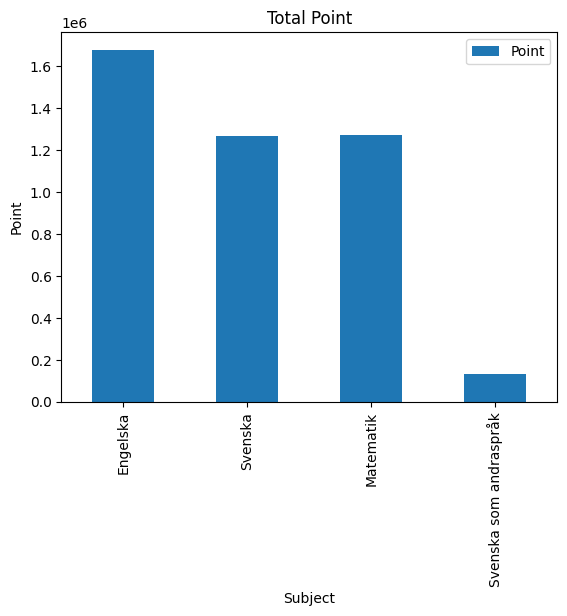

In [41]:
import seaborn as sns

df_total.plot(kind="bar", x="Subject", y="Point", xlabel="Subject", ylabel="Point", title="Total Point")